# 1. Introduction

**Title** <br>Predicting Movie Success <br><br>
**Participants** <br>Aleksandra Adamczak, and Saran Singh <br><br>

**Overview** <br>
With this assignment, our goal is to develop a machine learning model to predict movie revenue based on key features.

We aim to predict a movie's financial success, which is crucial for production and marketing decisions.
<br>
Many factors affect the success of a movie, and this project aims to explore and identify those key factors.

# 2. Data Exploration

We have two different data sources, both from Kaggle. 
- **Primary Data Source**: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data
- **Additional Data Source**: https://www.kaggle.com/datasets/phiitm/late-night-talk-show-youtube-dataset
---

<h4 style="margin-bottom: 0;">Primary Data Source:</h4>
This dataset contains a collection of 1,000,000 movies from the TMDB database.

We will use the following CSV files as our primary data sources:
1. `tmdb_5000_credits.csv`: Contains information about the cast and crew of each movie.  
2. `tmdb_5000_movies.csv`: Contains information about the movies.  
---

<h4 style="margin-bottom: 0;">Additional Data Source:</h4>
Both <b>Youtube</b>, and <b>Late Night Talk Shows</b> are very popular, we will use YouTube data from the Talk Shows to explore specific hypotheses, like does late-night promotions impact metrics like opening weekend revenue, etc.

We have data from the following six talk shows:
- Conan
- James Corden  
- Jimmy Fallon  
- Jimmy Kimmel  
- Seth Meyers  
- Stephen Colbert

---


### 2.1 Understand - Primary Dataset

In [1342]:
import pandas as pd
credits_df = pd.read_csv('Data- movies/Movies/tmdb_5000_credits.csv')
movies_df = pd.read_csv('Data- movies/Movies/tmdb_5000_movies.csv')

# Data structure overview
print(movies_df.info())
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Key Observations:
<br>
We have two datasets:
<br>
- Dataset 1: `movies_df`
    - This dataset seems to contain attributes related to movies.
    - **Shape**: 4,803 rows and 20 columns.
    - **Columns**: We have a mix of numerical like `budget`, `revenue`, `runtime` and categorical values like `genres`, `original_language`.
<br>
<br>
- Dataset 2: `credits_df`
    - This dataset contains cast, and crew information.
    - **Shape**: 4,803 rows and 4 columns.
    - **Columns**: `movie_id`, `title`, `cast`, and `crew`. `movie_id` contains numerical values, and rest cateogrical. 
<br>
- Both datasets seem to be connected via shared key which is <b> id </b> in `movies_df` and <b> movie_id </b> in `credits_df`, we will explore this further as this will help merge data easier.


2.2 Potential target variables

In [1343]:
print("Potential target variables:\n", movies_df[['revenue', 'vote_count', 'popularity', 'budget']].head())

Potential target variables:
       revenue  vote_count  popularity     budget
0  2787965087       11800  150.437577  237000000
1   961000000        4500  139.082615  300000000
2   880674609        4466  107.376788  245000000
3  1084939099        9106  112.312950  250000000
4   284139100        2124   43.926995  260000000


### 2.3 Missing values

In [1344]:
movies_missing_values = movies_df.isnull().sum()
credits_missing_values = credits_df.isnull().sum()


movies_missing_values = movies_missing_values[movies_missing_values > 0]
credits_missing_values = credits_missing_values[credits_missing_values > 0]

print("Movies- Columns with missing values:")
print(movies_missing_values)

print("Crew- Columns with missing values:")
print(credits_missing_values)


Movies- Columns with missing values:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64
Crew- Columns with missing values:
Series([], dtype: int64)


### 2.4 Zero values

In [1345]:
zero_values_movies = {}

for column in movies_df.columns:
    zero_count = (movies_df[column] == 0).sum()
    zero_values_movies[column] = zero_count

zero_values_movies = {key: value for key, value in zero_values_movies.items() if value > 0}

print("Columns with zero values - Movies:")
print(zero_values_movies)

# Let's do it for credits as well
zero_values_credits = {}

for column in credits_df.columns:
    zero_count = (credits_df[column] == 0).sum()
    zero_values_credits[column] = zero_count

zero_values_credits = {key: value for key, value in zero_values_credits.items() if value > 0}

print("\nColumns with zero values - Credits:")
print(zero_values_credits)

Columns with zero values - Movies:
{'budget': np.int64(1037), 'popularity': np.int64(1), 'revenue': np.int64(1427), 'runtime': np.int64(35), 'vote_average': np.int64(63), 'vote_count': np.int64(62)}

Columns with zero values - Credits:
{}


Observation:

We have a significant amount of zero values and missing values in the movies dataframe, while the credits dataframe does not contain any missing or zero values. However, given the large dataset available, we still have a very good amount of usable data.
We will further investigate these columns to decide on an action plan for handling them

### 2.5 Combine Datasets

We currently have two datasets in our Primary dataset: one containing movie details and the other with cast and crew information.

We also have another 5 data sources as our additonal datasets which are related to the talk shows.

Our goal is to merge these datasets into a single dataframe by extracting valuable insights. We will do it now since the next step is Splitting the data for test/train.

We will first explore this dataset to understand its structure and contents, then decide what specific information to extract and combine with the movie dataset.

We will start with the `credits_df`

In [1346]:
# Preview the credits dataset
print("First 5 rows of credits dataset:")
print(credits_df) 

First 5 rows of credits dataset:
      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"c

Obervations:
- `movie_id`:
    - This will be useful for merging with the main movies dataset.
- `title`:
    - We could also use the title for merging, but its more reliable to use the  id.
- `cast`: Contains JSON-like strings detailing the cast members.

Lets expand the cast column to visualize the data better and understand it.

In [1347]:
# View a single row's JSON content
import json

json_data = credits_df['cast'].iloc[0]  # First row
print(json.dumps(json_data, indent=4))  # Pretty-print JSON

"[{\"cast_id\": 242, \"character\": \"Jake Sully\", \"credit_id\": \"5602a8a7c3a3685532001c9a\", \"gender\": 2, \"id\": 65731, \"name\": \"Sam Worthington\", \"order\": 0}, {\"cast_id\": 3, \"character\": \"Neytiri\", \"credit_id\": \"52fe48009251416c750ac9cb\", \"gender\": 1, \"id\": 8691, \"name\": \"Zoe Saldana\", \"order\": 1}, {\"cast_id\": 25, \"character\": \"Dr. Grace Augustine\", \"credit_id\": \"52fe48009251416c750aca39\", \"gender\": 1, \"id\": 10205, \"name\": \"Sigourney Weaver\", \"order\": 2}, {\"cast_id\": 4, \"character\": \"Col. Quaritch\", \"credit_id\": \"52fe48009251416c750ac9cf\", \"gender\": 2, \"id\": 32747, \"name\": \"Stephen Lang\", \"order\": 3}, {\"cast_id\": 5, \"character\": \"Trudy Chacon\", \"credit_id\": \"52fe48009251416c750ac9d3\", \"gender\": 1, \"id\": 17647, \"name\": \"Michelle Rodriguez\", \"order\": 4}, {\"cast_id\": 8, \"character\": \"Selfridge\", \"credit_id\": \"52fe48009251416c750ac9e1\", \"gender\": 2, \"id\": 1771, \"name\": \"Giovanni R

Observation:
<br>
The JSON data above contains a list of cast members, with following details:
<br>
`cast_id:` A unique identifier for the cast memebers.
<br>
`character:` The character name played by the actor in the movie.
<br>
`credit_id:` A unique identifier for the credit record.
<br>
`gender:` Represents the gender of the actor (1 = female, 2 = male, 0 = unspecified/unknown).
<br>
`id:` A unique ID for the actor.
<br>
`name:` The name of the actor.
<br>
`order:` The billing order of the actor in the movie credits.


We have decided to extract following for each movie:
<br>
- Crew information:
    - Director's name.
    - Writers' names.
    - Producers' names.
    - Total crew size.
<br>
- Main actors:
    - Names of up to 3 main actors.
    - Genders of those actors.

In [1348]:
# Extraction of Main Actors data
import ast

def extract_main_actors(cast_column, max_actors=3):
    """
    Extracts the names and genders of the main actors from the cast column.
    """
    actor_names = []
    actor_genders = []
    
    for entry in cast_column:
        try:
            cast_data = ast.literal_eval(entry)
            cast_data = sorted(cast_data, key=lambda x: x.get('order', float('inf')))
            
            # Extract actor names and genders
            names = [cast_data[i].get('name', None) for i in range(min(len(cast_data), max_actors))]
            genders = [cast_data[i].get('gender', None) for i in range(min(len(cast_data), max_actors))]
            
            # Pad with None if fewer than max_actors
            while len(names) < max_actors:
                names.append(None)
                genders.append(None)
        except (ValueError, SyntaxError):
            # Handle invalid JSON-like strings
            names = [None] * max_actors
            genders = [None] * max_actors
        
        actor_names.append(names)
        actor_genders.append(genders)
    
    return actor_names, actor_genders

# Apply the function to the `credits_df`
actor_names, actor_genders = extract_main_actors(credits_df['cast'], max_actors=3)

# Add the results as separate columns
credits_df['main_actor_names'] = actor_names
credits_df['main_actor_genders'] = actor_genders

# Verify results
print(credits_df[['movie_id', 'main_actor_names', 'main_actor_genders']].head())


   movie_id                                  main_actor_names  \
0     19995  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1       285     [Johnny Depp, Orlando Bloom, Keira Knightley]   
2    206647      [Daniel Craig, Christoph Waltz, Léa Seydoux]   
3     49026      [Christian Bale, Michael Caine, Gary Oldman]   
4     49529    [Taylor Kitsch, Lynn Collins, Samantha Morton]   

  main_actor_genders  
0          [2, 1, 1]  
1          [2, 2, 1]  
2          [2, 2, 1]  
3          [2, 2, 2]  
4          [2, 1, 1]  


In [1349]:
# Extraction of crew data

import ast

def extract_crew_info(crew_list, job_title):
    """Extract crew member names based on their job title."""
    try:
        crew = ast.literal_eval(crew_list)
        return [member['name'] for member in crew if member['job'] == job_title]
    except (ValueError, SyntaxError):
        return []

def calculate_crew_size(crew_list):
    """Calculate the total number of crew members."""
    try:
        crew = ast.literal_eval(crew_list)
        return len(crew)
    except (ValueError, SyntaxError):
        return 0

# Extract Directors
credits_df['directors'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Director'))

# Extract Writers
credits_df['writers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Writer'))

# Extract Producers
credits_df['producers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Producer'))

# Calculate Crew Size
credits_df['crew_size'] = credits_df['crew'].apply(calculate_crew_size)

# Display the first few rows of the new columns
print(credits_df[['movie_id', 'directors', 'writers', 'producers', 'crew_size']].head())



   movie_id            directors          writers  \
0     19995      [James Cameron]  [James Cameron]   
1       285     [Gore Verbinski]               []   
2    206647         [Sam Mendes]               []   
3     49026  [Christopher Nolan]               []   
4     49529     [Andrew Stanton]               []   

                                           producers  crew_size  
0                        [James Cameron, Jon Landau]        153  
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...         32  
2              [Barbara Broccoli, Michael G. Wilson]        155  
3    [Charles Roven, Christopher Nolan, Emma Thomas]        217  
4        [Colin Wilson, Jim Morris, Lindsey Collins]        132  


Obeservation:
<br>
We notice that most movies have a single director, as expected. We also notice that the writers column is empty for some rows, which might indicate missing data, if it is indeed empty, we can tag it unknown.
Crew size vary significantly, reflecting the scale of production for each movie, this column helps provide a peak into the resourcess allocated for each movie which we would explore further.
<br>
<br>
Since some of the writers rows were empty. Lets first check for empty values in the extracted columns.

In [1350]:
# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")


main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 30 missing rows
writers: 3252 missing rows
producers: 1023 missing rows


Observations:
<br>
We do have some significat missing data.

- For features like writers, directors, and producers, we will be replacing missing values with placeholders  "Unknown".

Let's proceed with replacing the missing values.

In [1351]:
# Replace missing values in the specified columns with "Unknown"
columns_to_replace = ['writers', 'directors', 'producers']

for column in columns_to_replace:
    credits_df[column] = credits_df[column].apply(lambda x: x if len(x) > 0 else ["Unknown"])

# Verify the changes
print("Updated 'writers', 'directors', and 'producers' columns:")
print(credits_df[['writers', 'directors', 'producers']].head())


Updated 'writers', 'directors', and 'producers' columns:
           writers            directors  \
0  [James Cameron]      [James Cameron]   
1        [Unknown]     [Gore Verbinski]   
2        [Unknown]         [Sam Mendes]   
3        [Unknown]  [Christopher Nolan]   
4        [Unknown]     [Andrew Stanton]   

                                           producers  
0                        [James Cameron, Jon Landau]  
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...  
2              [Barbara Broccoli, Michael G. Wilson]  
3    [Charles Roven, Christopher Nolan, Emma Thomas]  
4        [Colin Wilson, Jim Morris, Lindsey Collins]  


In [1352]:
#  Lets confirm that it worked.

# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")

# Count how many unknowns are there- just to sure that it matches the missing values we had before.
unknown_directors = credits_df['directors'].apply(lambda x: 'Unknown' in x).sum()
unknown_writers = credits_df['writers'].apply(lambda x: 'Unknown' in x).sum()
unknown_producers = credits_df['producers'].apply(lambda x: 'Unknown' in x).sum()
print(f"Unknown directors: {unknown_directors}")
print(f"Unknown writers: {unknown_writers}")
print(f"Unknown producers: {unknown_producers}")

main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 0 missing rows
writers: 0 missing rows
producers: 0 missing rows
Unknown directors: 30
Unknown writers: 3252
Unknown producers: 1023


Lets proceed with merging the datasets.  
We need to ensure that we only merge the movies that are currently present in out movies dataframe since some of the rows were removed.

In [1353]:
# Merge the cleaned_movies_df with the processed credits_df
movies_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner')

# Verify the results of the merge
print("Merged DataFrame shape:", movies_df.shape)
print("Merged DataFrame preview:")
print(movies_df.head())

# Check for any movies in movies_df that did not have matching records in credits_df
unmatched_movies = movies_df[~movies_df['id'].isin(credits_df['movie_id'])]
print(f"\nNumber of unmatched movies: {unmatched_movies.shape[0]}")

Merged DataFrame shape: (4803, 30)
Merged DataFrame preview:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"},

Now lets look at the talk shows dataset.

We will begin with `Conan`.

In [1416]:
conan_df = pd.read_csv('Data- movies/Talk_Show/Conan.csv')

# print a few rows for each column
print(conan_df.head())

     publishedAtSQL                                         videoTitle  \
0  12-06-2020 12:00  Deon Cole On White Protester Signs That Missed...   
1  11-06-2020 23:34  Nicole Byer On Finding Humor In Pain - CONAN o...   
2  11-06-2020 23:32  Sona Crashes Conan's Interview With Nicole Bye...   
3  11-06-2020 00:00  Senator Cory Booker On This Crossroads In Amer...   
4  10-06-2020 21:03  Senator Cory Booker Wants This To Be A Moral M...   

                                    videoDescription videoCategoryId  \
0  Deon Cole shares some white protester signs th...              23   
1  Nicole Byer on racial inequality in healthcare...              23   
2  Sona is a huge fan of Nicole Byer, “Nailed It!...              23   
3  Senator Cory Booker discusses the killing of G...              23   
4  Senator Cory Booker discusses President Trump’...              23   

  videoCategoryLabel durationSec definition caption  licensedContent  \
0             Comedy         124         hd   Fals

The data here seems fairly new. Let's find the oldest record in the dataset to determine if we can match it with movies in our existing dataset released during the same period. If not, it may not be as useful and could introduce bias.

In [1435]:
# Convert 'publishedAtSQL' to datetime format with dayfirst=True
try:
    conan_df['publishedAtSQL'] = pd.to_datetime(conan_df['publishedAtSQL'], dayfirst=True)
except Exception as e:
    raise

# Display the first 5 records of the 'publishedAtSQL' column sorted by earliest date for Conan dataset
sorted_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head()
print ("\nEarliest published dates in Conan dataset:")
print(sorted_published_dates)

# Sort by 'publishedAtSQL' in descending order and display the first 5 rows
newest_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=False)[['publishedAtSQL']].head()
print("\nNewest published dates in Conan dataset:")
print(newest_published_dates)

# Display the first 5 records of the 'release_date' column sorted by earliest date for Movies dataset
sorted_release_dates1 = movies_df.sort_values(by='release_date', ascending=True)['release_date'].head()
print("\nEarliest release dates in movies dataset:")
print(sorted_release_dates1)

# Sort by 'release_date' in descending order and display the first 5 rows
newest_release_dates = movies_df.sort_values(by='release_date', ascending=False)[['release_date']].head()
print("\nNewest release dates in movies dataset:")
print(newest_release_dates)


Earliest published dates in Conan dataset:
8724   2010-08-19 15:57:00
8723   2010-08-23 22:34:00
8722   2010-08-25 23:06:00
8721   2010-08-26 00:21:00
8720   2010-08-27 00:47:00
Name: publishedAtSQL, dtype: datetime64[ns]

Newest published dates in Conan dataset:
       publishedAtSQL
0 2020-06-12 12:00:00
1 2020-06-11 23:34:00
2 2020-06-11 23:32:00
3 2020-06-11 00:00:00
4 2020-06-10 21:03:00

Earliest release dates in movies dataset:
4592    1916-09-04
4661    1925-11-05
2638    1927-01-10
4457    1929-01-30
4594    1929-02-08
Name: release_date, dtype: object

Newest release dates in movies dataset:
     release_date
4255   2017-02-03
3408   2016-10-02
3302   2016-09-16
4720   2016-09-09
3249   2016-09-09


Our movie data is much older, and its not very new as compared to the talk show. Lets look at other talk shows.

In [1430]:
# List of files and dataframes
file_names = [
    'Data- movies/Talk_Show/James_Corden.csv',
    'Data- movies/Talk_Show/Jimmy_Fallon.csv',
    'Data- movies/Talk_Show/Jimmy_Kimmel.csv',
    'Data- movies/Talk_Show/Seth_Meyers.csv',
    'Data- movies/Talk_Show/Stephen_Colbert.csv'
]

dataframes = {}

# Load and process each dataframe
for file_name in file_names:
    df_name = file_name.split('/')[-1].split('.')[0]
    dataframes[df_name] = pd.read_csv(file_name)
    try:
        # Convert 'publishedAtSQL' to datetime
        dataframes[df_name]['publishedAtSQL'] = pd.to_datetime(
            dataframes[df_name]['publishedAtSQL'], dayfirst=True, errors='coerce'
        )
    except Exception as e:
        print(f"Error processing {df_name}: {e}")
        continue
    
    # Display the earliest 5 dates for each dataset
    print(f"\nEarliest 5 records for {df_name}:")
    print(dataframes[df_name].sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head())


Earliest 5 records for James_Corden:
4138   2015-02-07 22:30:00
4137   2015-02-09 03:48:00
4136   2015-03-10 14:00:00
4135   2015-03-16 19:11:00
4134   2015-03-17 22:25:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Fallon:
5979   2012-04-13 04:34:00
5978   2012-04-25 02:19:00
5977   2012-04-25 03:14:00
5976   2012-04-25 05:21:00
5975   2012-05-25 04:35:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Kimmel:
4733   2009-01-16 14:30:00
4732   2009-01-16 14:37:00
4731   2009-06-04 07:16:00
4730   2009-08-27 22:48:00
4728   2009-10-02 05:57:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Seth_Meyers:
3337   2014-02-21 23:30:00
3336   2014-02-21 23:36:00
3335   2014-02-26 05:31:00
3334   2014-02-28 05:27:00
3333   2014-03-01 06:34:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Stephen_Colbert:
6754   2015-06-03 17:00:00
6753   2015-06-04 17:36:00
6752   2015-06-08 21:05:00
6751   2015

Overvations: 
- The talk show data is significantly newer compared to the movies dataset, which spans over a century. This mismatch would make it challenging to draw meaningful insights
- Using the talk show data could introduce signification bias because only modern movies will likely be represented. This would lead to concludions that do not generalize well.


The talk show data comes from a different source than the movies dataset. That is reason for this mismatch, it could introduce errors, misinterpretations.
<br>
We have decided not to use the talk show data 

# 3. Data Cleaning

### 3.1 Handle Missing data and Zero values  <h5>[Link to analysis](#analysis1)</h5>  <a id="#analysis2"></a>

- Budget and Revenue:
    - We have signification amount of zero values for both (1037 for budget, 1427 for revenue). For our model, these two are very important features: <br> Since we are working with a very large amount of dataset which contains 4803 rows, we have decided that we <b>drop</b> these rows that contain missing information as replacing these with placehodler values would create bias, and provide little to no value. <br>

- Homepage: Contains 3091 missing values, this column does not provide any value. We have decided to drop it this column.

- release_date, popularity, and runtime: These columns contain a few missing values/zeros we will drop these rows it will have very minimal impact.

- Both vote_average and vote count have zero values 
    - A zero value likely indicates that no meaningful votes were recorded for the movie. We are leaving them as-is as they don't form a large portion of the dataset.
    - It might have been also okay to drop both vote_average, vote_count since we don't know the source of these votes. But we have decided to keep it for now
     
- Tagline contains 844 missing values. Let's understand what it represents first
- Lets also understand what overview contains as it contains missing values

In [1354]:
# Pring first 5 rows of tagline
print(movies_df['tagline'].head())

# Print first 5 rows of overview
print(movies_df['overview'].head())

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object
0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


- We haev decided to drop tagline and overview column as well, as it will have no impact in our analysis.

In [1355]:
# Drop rows with zero or missing values in important columns
columns_to_check = ['budget', 'revenue', 'release_date', 'popularity', 'runtime']
cleaned_movies_df = movies_df.copy()
for col in columns_to_check:
    if col in ['budget', 'revenue']:
        cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]
    else:
        cleaned_movies_df = cleaned_movies_df.dropna(subset=[col])
        if cleaned_movies_df[col].dtype in ['int64', 'float64']:
            cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]

### 3.2 Split test data

Before proceeding to further data processing. Lets split the training test data.

In [1356]:
#Split data for training
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
target_column = 'revenue'  # 'revenue' is our target
X = movies_df.drop(columns=[target_column])
y = movies_df[target_column]

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Merge `y` back for easier manipulation in training set
train_df = X_train.copy()
train_df[target_column] = y_train

test_df = X_test.copy()
test_df[target_column] = y_test

# Verify the split
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (3842, 30)
Test data shape: (961, 30)


In [1357]:
# Drop irrelevant columns
columns_to_drop = ['homepage', 'tagline', 'overview']
cleaned_movies_df = cleaned_movies_df.drop(columns=columns_to_drop)

In [1358]:
# Verify the results
print("Remaining rows after cleaning:", cleaned_movies_df.shape[0])
print("Remaining columns after cleaning:", cleaned_movies_df.shape[1])

Remaining rows after cleaning: 3229
Remaining columns after cleaning: 27


### 3.3 Outlier analysis

#### Budget

Summary statistics for 'budget':
count    3.229000e+03
mean     4.065444e+07
std      4.439674e+07
min      1.000000e+00
25%      1.050000e+07
50%      2.500000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


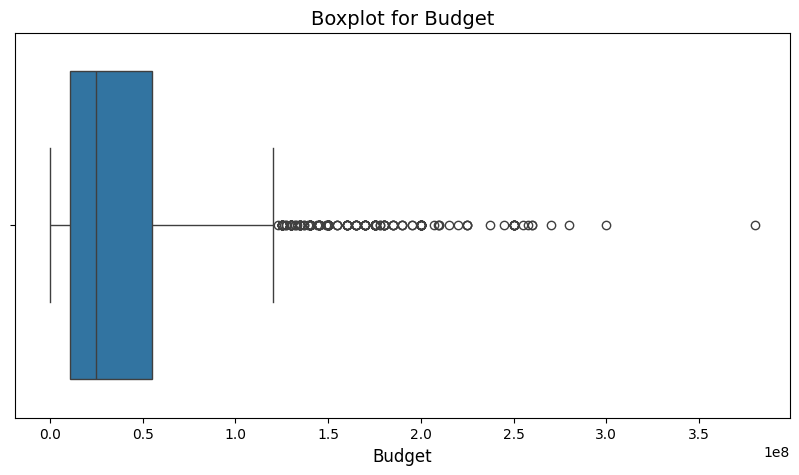

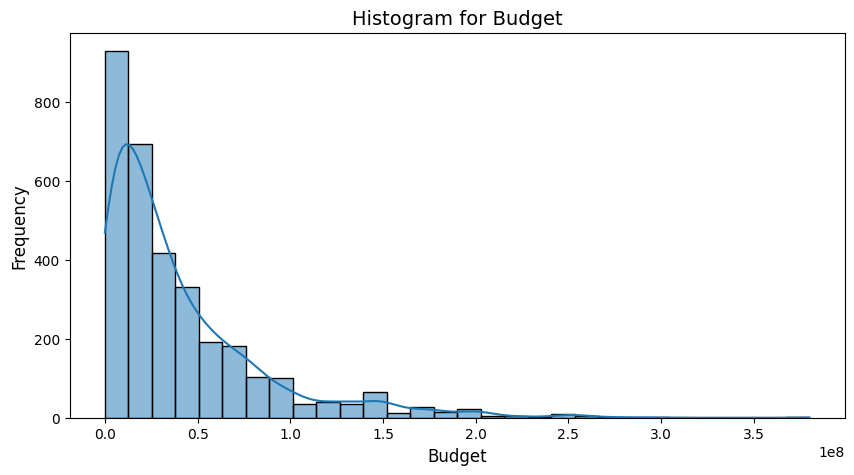

Lower bound for outliers: -56250000.0
Upper bound for outliers: 121750000.0
Number of outliers in 'budget': 216
Examples of outliers:
                                    title_y     budget
0                                    Avatar  237000000
1  Pirates of the Caribbean: At World's End  300000000
2                                   Spectre  245000000
3                     The Dark Knight Rises  250000000
4                               John Carter  260000000


In [1359]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics for 'budget':")
print(cleaned_movies_df['budget'].describe())

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=cleaned_movies_df['budget'])
plt.title('Boxplot for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_movies_df['budget'], bins=30, kde=True)
plt.title('Histogram for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Identify potential outliers []
q1 = cleaned_movies_df['budget'].quantile(0.25)
q3 = cleaned_movies_df['budget'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Q1 (25th percentile): The value below which 25% of the data lies.
# Q3 (75th percentile): The value below which 75% of the data lies.
# IQR = Q3 - Q1.    

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

outliers = cleaned_movies_df[(cleaned_movies_df['budget'] < lower_bound) | (cleaned_movies_df['budget'] > upper_bound)]
print(f"Number of outliers in 'budget': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'budget']].head())


Observation from the Boxplot:
- The upper threshold for outliers is 120 million (120,000,000).
- Any movie with a budget above this is considered an outlier.
- There are 216 outliers (movies with extremely high budgets) in our dataset which makes sense.

Observations from the Histrogram:
- The histogram shows a long tail on the right side, meaning there are a few movies with extremely high budgets.
- Most of the budget values are concentrated on the left (lower budgets), while only a small number of movies have very high budgets (outliers).
- y-axis in the histogram represent number of movies, and x-axis the budget.
- x-axis in the histogram is scaled in scientific notation because the budget values are very large.

Summary:
Given that Budget will be one of the most important features for our model training, removing or transforming these budget outliers could erase valuable insights how these big-budget movies like avatar impact
revenue. A log transformation would reduce the budget values, which might supress meaningful variations between small, mid-range, and high-budget movies. We will keep these outlier, and train our model to learn from this instead of discarding it.


#### Revenue

Summary statistics for 'revenue':
count    3.229000e+03
mean     1.212430e+08
std      1.863029e+08
min      5.000000e+00
25%      1.700000e+07
50%      5.518472e+07
75%      1.462920e+08
max      2.787965e+09
Name: revenue, dtype: float64


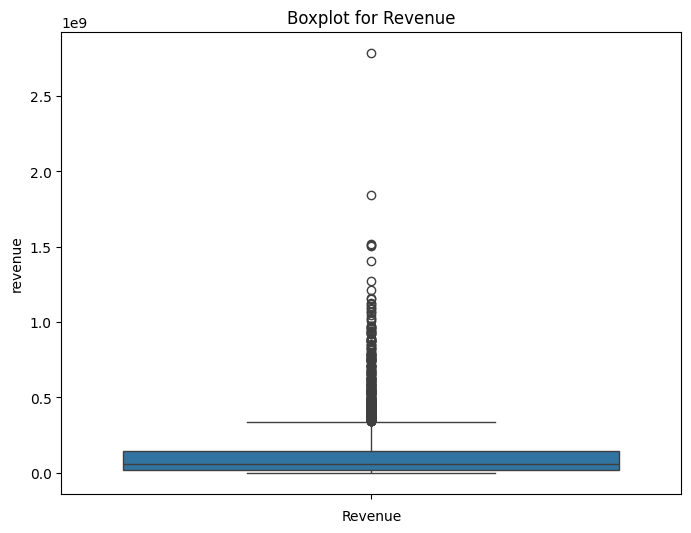

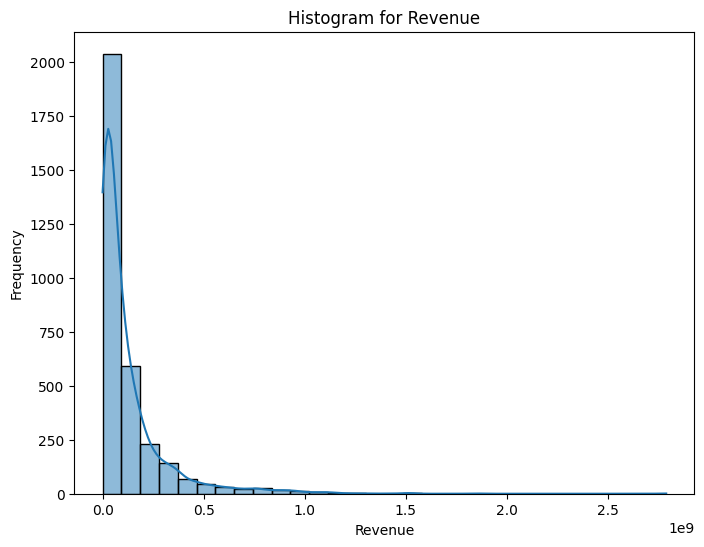


Lower bound for outliers: -176938013.5
Upper bound for outliers: 340230022.5
Number of outliers in 'revenue': 285

Examples of outliers:
                                    title_y     revenue
0                                    Avatar  2787965087
1  Pirates of the Caribbean: At World's End   961000000
2                                   Spectre   880674609
3                     The Dark Knight Rises  1084939099
5                              Spider-Man 3   890871626


In [1360]:
# Step 1: Summary Statistics for Revenue
revenue_summary = cleaned_movies_df['revenue'].describe()
print("Summary statistics for 'revenue':")
print(revenue_summary)

# Step 2: Boxplot to Visualize Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(cleaned_movies_df['revenue'])
plt.title("Boxplot for Revenue")
plt.xlabel("Revenue")
plt.show()

# Step 3: Histogram to Visualize Distribution
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['revenue'], kde=True, bins=30)
plt.title("Histogram for Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Step 4: Identify Outliers using IQR
q1_revenue = cleaned_movies_df['revenue'].quantile(0.25)
q3_revenue = cleaned_movies_df['revenue'].quantile(0.75)
iqr_revenue = q3_revenue - q1_revenue

lower_bound = q1_revenue - 1.5 * iqr_revenue
upper_bound = q3_revenue + 1.5 * iqr_revenue

outliers_revenue = cleaned_movies_df[(cleaned_movies_df['revenue'] < lower_bound) | 
                                     (cleaned_movies_df['revenue'] > upper_bound)]

print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'revenue': {len(outliers_revenue)}")

# Step 5: Examples of Outliers
print("\nExamples of outliers:")
print(outliers_revenue[['title_y', 'revenue']].head())


Summary:
<br>
The boxplot and histogram for revenue show a heavily right-skewed distribution with numerous outliers on the higher end. These outliers represent blockbuster movies like Avatar, which have exceptionally high revenues similar to what we saw with Budget.
<br>
- Skewness:
    - The revenue data is positively skewed, as the majority of movies have relatively low revenue, and only a few movies have extremely high revenue.
<br>
- Outliers:
<br>
    - A significant number of outliers appear above the upper whisker in the boxplot.
    - These outliers are movies with extraordinarily high revenues, representing major hits.

Similar to the budget column, outliers in revenue represent critical data points since they indicate blockbuster hits. Removing these outliers might distort the analysis because:
Since our goal is to predict revenue, so high-value outliers provide essential insights into what makes movies financially successful. We will keep these outliers as well.


#### Popularity

Summary statistics for 'popularity':
count    3229.000000
mean       29.033689
std        36.165730
min         0.019984
25%        10.446722
50%        20.410354
75%        37.335721
max       875.581305
Name: popularity, dtype: float64


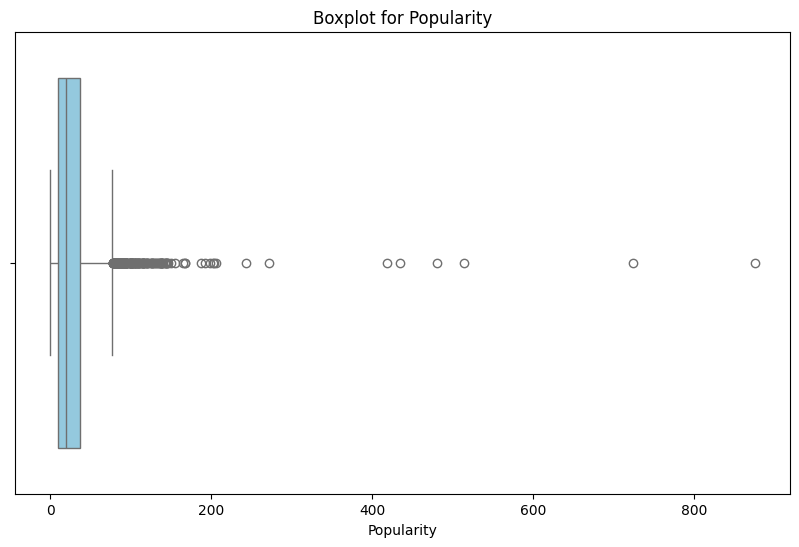

Lower bound for outliers: -29.886776499999996
Upper bound for outliers: 77.6692195
Number of outliers in 'popularity': 175
Examples of outliers:
                                    title_y  popularity
0                                    Avatar  150.437577
1  Pirates of the Caribbean: At World's End  139.082615
2                                   Spectre  107.376788
3                     The Dark Knight Rises  112.312950
5                              Spider-Man 3  115.699814


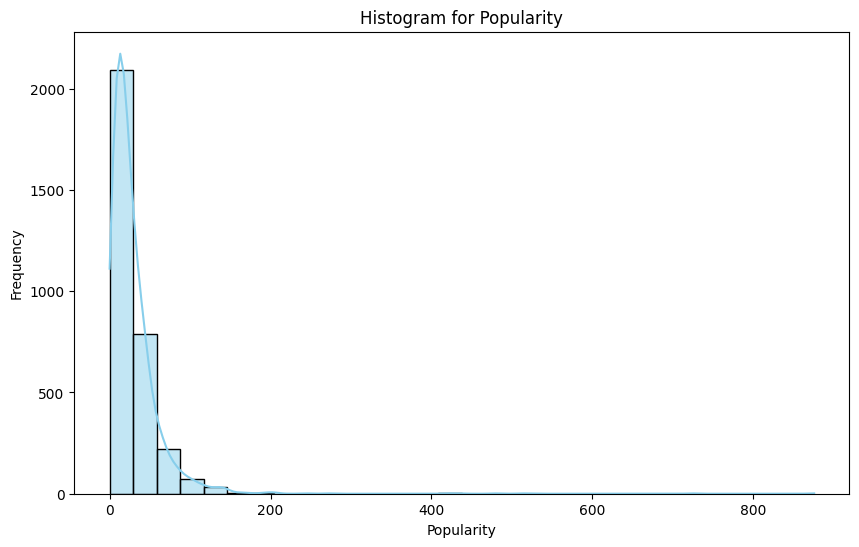

In [1361]:
# Summary statistics
print("Summary statistics for 'popularity':")
print(cleaned_movies_df['popularity'].describe())

# Boxplot for popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['popularity'], color='skyblue')
plt.title("Boxplot for Popularity")
plt.xlabel("Popularity")
plt.show()

# Calculate outlier thresholds
q1 = cleaned_movies_df['popularity'].quantile(0.25)
q3 = cleaned_movies_df['popularity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = cleaned_movies_df[(cleaned_movies_df['popularity'] < lower_bound) | 
                             (cleaned_movies_df['popularity'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'popularity': {outliers.shape[0]}")

# Examples of outliers
print("Examples of outliers:")
print(outliers[['title_y', 'popularity']].head())

# Histogram for popularity
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Histogram for Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

Summary:
The popularity distribution is highly right-skewed, with the majority of movies having a low popularity score. There are significant outliers above 78.5

We decided to not transform or remove these outliers for following reasons:
- High popularity might be one of the strongest signals for predicting high revenue. By excluding or transforming it, we would risk diminishing the relationship between popularity and revenue.
- We can later group movies by popularity tiers like low, medium, high to analyze their influence on revenue without discarding data.

#### Runtime

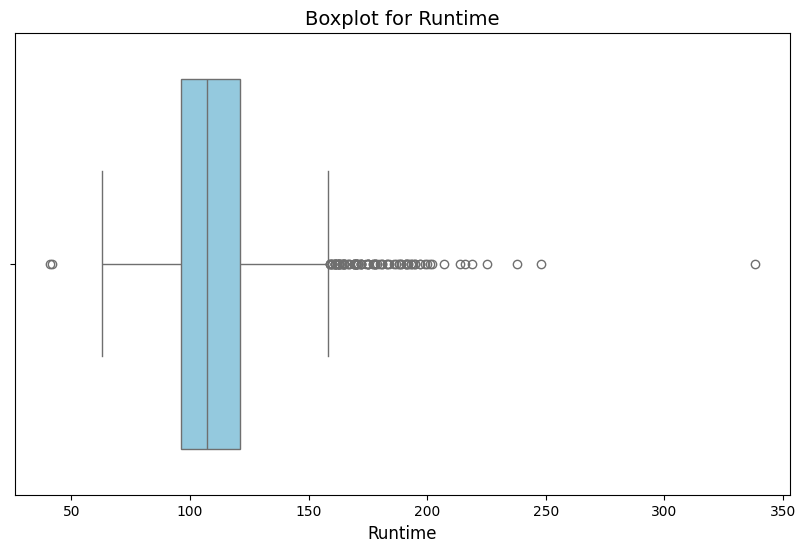

Summary statistics for 'runtime':
count    3229.000000
mean      110.724373
std        20.965694
min        41.000000
25%        96.000000
50%       107.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64


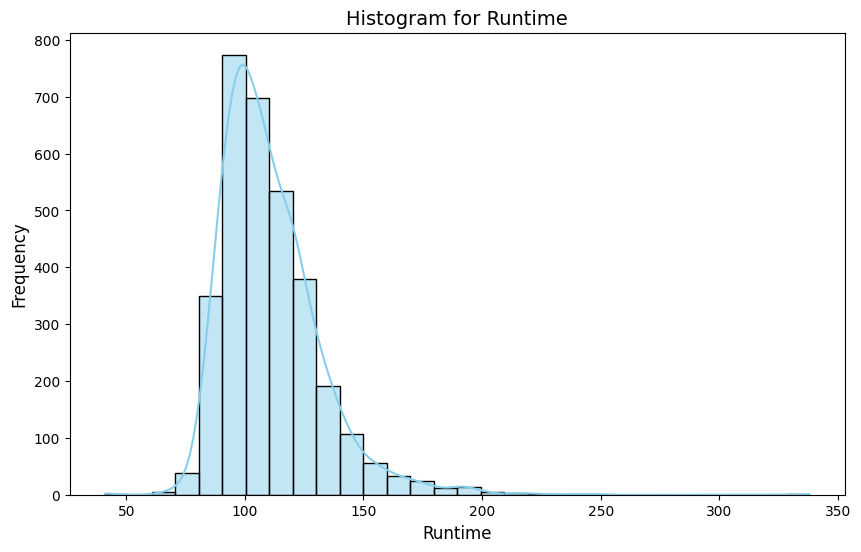

Lower bound for outliers: 58.5
Upper bound for outliers: 158.5
Number of outliers in 'runtime': 99
Examples of outliers:
                                     title_y  runtime
0                                     Avatar    162.0
1   Pirates of the Caribbean: At World's End    169.0
3                      The Dark Knight Rises    165.0
22       The Hobbit: The Desolation of Smaug    161.0
24                                 King Kong    187.0


In [1362]:
# Boxplot for runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['runtime'], color="skyblue")
plt.title("Boxplot for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.show()

# Summary statistics for runtime
runtime_summary = cleaned_movies_df['runtime'].describe()
print("Summary statistics for 'runtime':")
print(runtime_summary)

# Histogram for runtime
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['runtime'], kde=True, bins=30, color="skyblue")
plt.title("Histogram for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Calculate IQR for runtime
Q1 = cleaned_movies_df['runtime'].quantile(0.25)
Q3 = cleaned_movies_df['runtime'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_runtime = cleaned_movies_df[(cleaned_movies_df['runtime'] < lower_bound) | (cleaned_movies_df['runtime'] > upper_bound)]
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print(f"Number of outliers in 'runtime': {len(outliers_runtime)}")
print("Examples of outliers:")
print(outliers_runtime[['title_y', 'runtime']].head())

Summary:
- The mean runtime is around 110 minutes, with a standard deviation of 20.73 minutes.
- Most movies have a runtime between 96 (25th percentile) and 121 (75th percentile) minutes.
- Outliers exist, with runtimes below 58.5 minutes (unusually short) or above 158.5 minutes (unusually long).
<br>
Box Plot:
- A significant number of movies falls within the interquartile range (IQR).
- Some extreme outliers, such as "King Kong" (187 minutes), extend well beyond the upper bound.
<br>
Histrogram:
- The distribution appears roughly normal, centered around the mean, but there is a slight right skew due to longer movies.
- A large proportion of movies have runtimes between 90 and 120 minutes.

Runtime is a meaningful feature for audience engagement for us, so retaining the outliers is important to understand these patterns. If required we could group the runtimes into categories like (short, standard, long) for better interpetability.

We have decided to keep it as it is.

#### Vote Average

Summary statistics for 'vote_average':
count    3229.000000
mean        6.309353
std         0.873891
min         0.000000
25%         5.800000
50%         6.300000
75%         6.900000
max         8.500000
Name: vote_average, dtype: float64

Lower bound for outliers: 4.149999999999999
Upper bound for outliers: 8.55
Number of outliers in 'vote_average': 43
Examples of outliers:
                                  title_y  vote_average
259               Speed 2: Cruise Control           4.1
272                        Town & Country           3.7
480                     Battlefield Earth           3.0
499                         Jack and Jill           4.1
503  The Adventures of Rocky & Bullwinkle           3.9


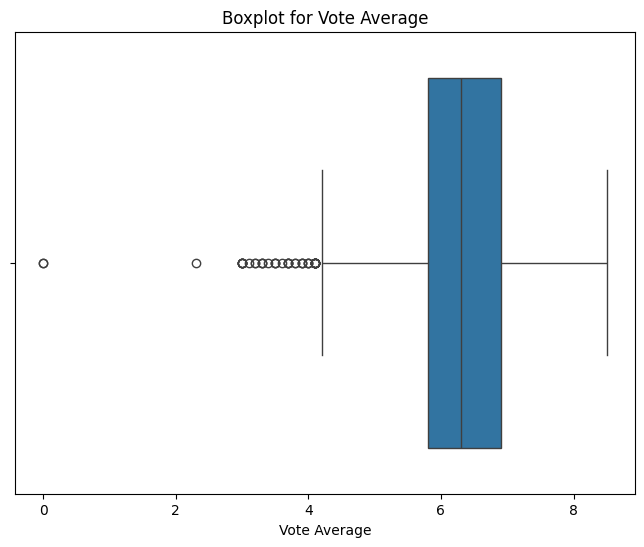

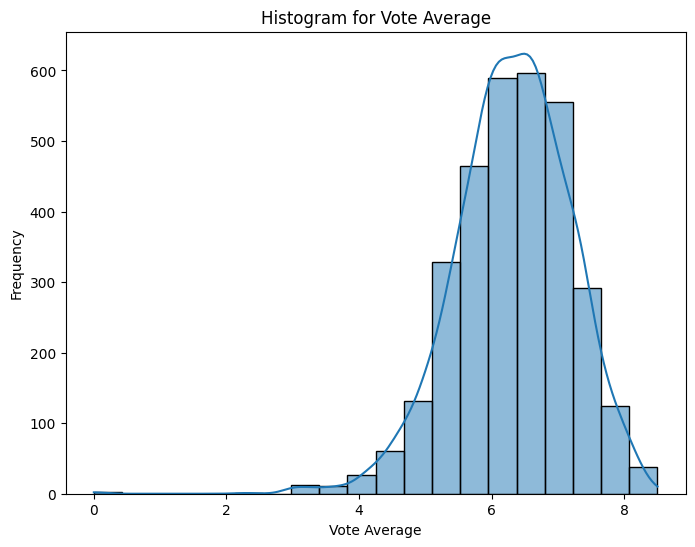

In [1363]:
# Calculate summary statistics for vote_average
vote_avg_summary = cleaned_movies_df['vote_average'].describe()
print("Summary statistics for 'vote_average':")
print(vote_avg_summary)

# Calculate IQR and outliers
q1_vote_avg = vote_avg_summary['25%']
q3_vote_avg = vote_avg_summary['75%']
iqr_vote_avg = q3_vote_avg - q1_vote_avg

lower_bound_vote_avg = q1_vote_avg - 1.5 * iqr_vote_avg
upper_bound_vote_avg = q3_vote_avg + 1.5 * iqr_vote_avg

outliers_vote_avg = cleaned_movies_df[
    (cleaned_movies_df['vote_average'] < lower_bound_vote_avg) |
    (cleaned_movies_df['vote_average'] > upper_bound_vote_avg)
]

print(f"\nLower bound for outliers: {lower_bound_vote_avg}")
print(f"Upper bound for outliers: {upper_bound_vote_avg}")
print(f"Number of outliers in 'vote_average': {len(outliers_vote_avg)}")
print("Examples of outliers:")
print(outliers_vote_avg[['title_y', 'vote_average']].head())

# Plot boxplot for vote_average
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_movies_df['vote_average'])
plt.title("Boxplot for Vote Average")
plt.xlabel("Vote Average")
plt.show()

# Plot histogram for vote_average
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['vote_average'], kde=True, bins=20)
plt.title("Histogram for Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()


Boxplot: Outliers are present on both ends, these represent movies with extremely low or high audience ratings.
<br><br>
Histogram: The distribution appears approximately normal, centered around the mean, but with some skewness due to the presence of extreme low values
<br>
<br>
Summary:
- 75% of movies have a vote average below 6.9.
- Vote averages are values reflecting audience or critic opinion. These values might provide critical insights into extreme cases like universally liked or widely disliked movies.
- These might also correlate with other features like revenue or popularity, adding value to the analysis.
<br>
<br>
Since the distribution is almost normal, a transformation like log scaling is unnecessary. We will keep it as it is.

#### Vote Count

Summary statistics for 'vote_count':
count     3229.000000
mean       977.287395
std       1414.309577
min          0.000000
25%        178.000000
50%        471.000000
75%       1148.000000
max      13752.000000
Name: vote_count, dtype: float64

Lower bound for outliers: -1277.0
Upper bound for outliers: 2603.0
Number of outliers in 'vote_count': 305
Examples of outliers:
                                    title_y  vote_count
0                                    Avatar       11800
1  Pirates of the Caribbean: At World's End        4500
2                                   Spectre        4466
3                     The Dark Knight Rises        9106
5                              Spider-Man 3        3576


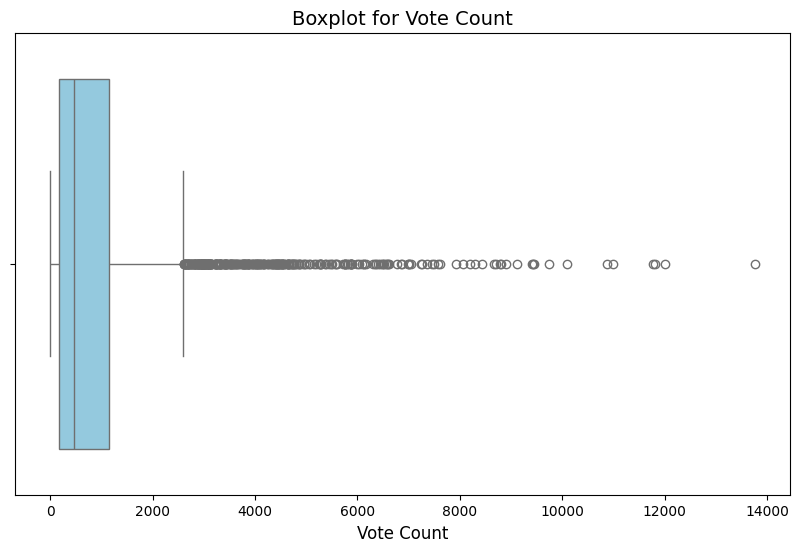

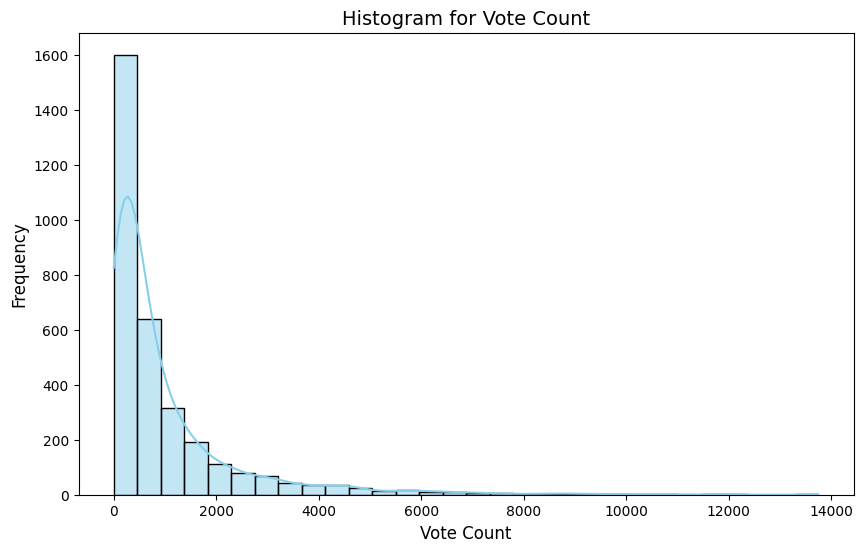

In [1364]:
# Summary statistics
print("Summary statistics for 'vote_count':")
print(cleaned_movies_df['vote_count'].describe())

# Identify outliers using IQR
Q1 = cleaned_movies_df['vote_count'].quantile(0.25)
Q3 = cleaned_movies_df['vote_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_movies_df[(cleaned_movies_df['vote_count'] < lower_bound) | (cleaned_movies_df['vote_count'] > upper_bound)]
print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'vote_count': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'vote_count']].head())

# Boxplot for vote_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['vote_count'], color="skyblue")
plt.title("Boxplot for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.show()

# Histogram for vote_count
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['vote_count'], bins=30, kde=True, color="skyblue")
plt.title("Histogram for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


Summary:
- Outliers like Avatar and Pirates of the Caribbean are expected because hits naturally attract more audience interaction.
- Movies with high vote counts are not data errors but instead exceptional cases. Removing them would eliminate valuable insights into audience engagement. 

We decided to perform <b> log transformation </b> on this feature as it is extremely skewed: most movies have very few votes, while a small number have exceptionally high counts and this creates an imbalance that can dominate model training and hinder its ability to generalize across all movies.

In [1365]:
import numpy as np

# Apply log transformation to 'vote_count'
cleaned_movies_df['log_vote_count'] = np.log1p(cleaned_movies_df['vote_count'])

# Display a summary of the transformed feature
print("Summary statistics for 'log_vote_count':")
print(cleaned_movies_df['log_vote_count'].describe())


Summary statistics for 'log_vote_count':
count    3229.000000
mean        6.035145
std         1.453596
min         0.000000
25%         5.187386
50%         6.156979
75%         7.046647
max         9.529012
Name: log_vote_count, dtype: float64


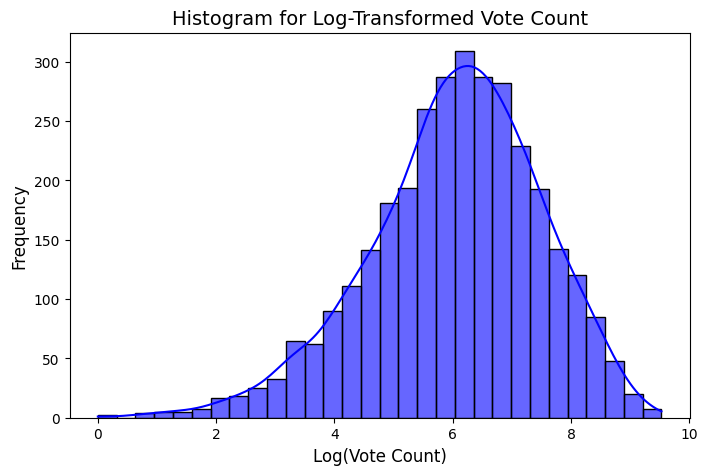

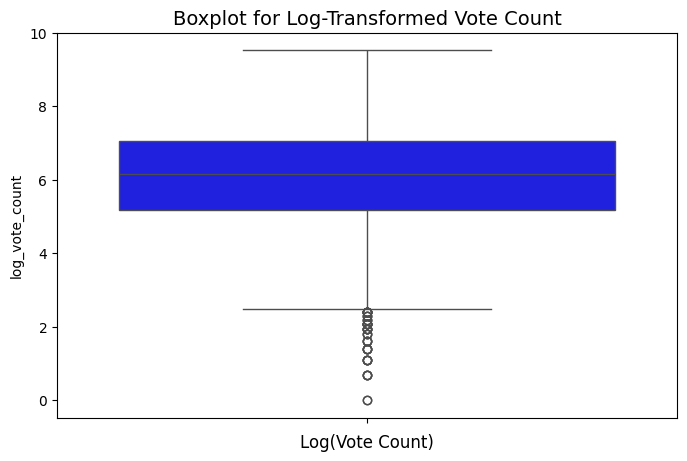

In [1366]:
#Visualize it

# Histogram of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_movies_df['log_vote_count'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Boxplot of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.boxplot(cleaned_movies_df['log_vote_count'], color='blue')
plt.title('Boxplot for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.show()


Summary after the transformation:
<br>
As per above, the transformation appears to have worked well:
<br>
- Histogram: The log-transformed histogram now indicates that the extreme skewness of the original data has been reduced significantly

- Boxplot: The range of values is now compressed, and the boxplot shows a much tighter interquartile range. While there are still outliers, they are less extreme in terms of deviation from the bulk of the data.

In [1367]:
# lets drop the original vote_count column
cleaned_movies_df = cleaned_movies_df.drop(columns=['vote_count'])

# Rename the log-transformed column to 'vote_count'
cleaned_movies_df.rename(columns={'log_vote_count': 'vote_count'}, inplace=True)

## Feature selection, and Engineering

### 5.1 Categorical columns

Identify Categorical columns

<p>Lets first print the first 5 rows to understand some of the columns</p>

In [1368]:
# Identify the categorical columns
categorical_columns = cleaned_movies_df.select_dtypes(include=['object']).columns

# Print the first 5 rows of each categorical column
print("First 5 rows of categorical columns:")
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(cleaned_movies_df[column].head())


First 5 rows of categorical columns:

Column: genres
0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

Column: keywords
0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

Column: original_language
0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

Column: original_title
0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4      

Quality of Data

After the merge, we now have two <b>title</b> columns representing the same information, lets drop one.

In [1369]:
# Drop the duplicate title column (title_y)
cleaned_movies_df = cleaned_movies_df.drop(columns=['title_y'])

# Rename title_x to title
cleaned_movies_df = cleaned_movies_df.rename(columns={'title_x': 'title'})

# Confirm the change
print("Columns after dropping 'title_y':")
print(cleaned_movies_df.columns)


Columns after dropping 'title_y':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'movie_id',
       'cast', 'crew', 'main_actor_names', 'main_actor_genders', 'directors',
       'writers', 'producers', 'crew_size', 'vote_count'],
      dtype='object')


Since both `cast` and `crew` have been extracted as new fearures. we don't need to keep these two columns. Lets drop these.

In [1370]:
# Drop cast, and crew columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['cast', 'crew'])

# Confirm the change
print("Columns after dropping 'cast' and 'crew':")
print(cleaned_movies_df.columns)

Columns after dropping 'cast' and 'crew':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'movie_id',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'vote_count'],
      dtype='object')


We might be able to drop both `keywords`, and `original_title`. Lets inspect these further, and decide whether these should be dropped.

In [1371]:
print(cleaned_movies_df['keywords'].value_counts())

keywords
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   97
[{"id": 10183, "name": "independent film"}]                                                                                                                                                                                                                                                                            

`keywords` column seems to contain metadata related to the movies. Upon further inspecting this column, it does not contain anything valuable as we already have the required metadata in other columns. We can safely drop it.

In [1372]:
# We can drop the keywords and column as it is not useful for our analysis
cleaned_movies_df = cleaned_movies_df.drop(columns=['keywords'])

Now lets see how many movies contain English as orignal language ? It might help narrow our approach to just english since our secondary dataset contains talk shows that are only in English.

In [1373]:
print(cleaned_movies_df['original_language'].value_counts())



original_language
en    3102
fr      25
es      15
ja      13
zh      13
de       9
hi       7
it       6
ru       6
cn       5
ko       5
da       4
pt       2
th       2
nl       2
id       2
te       1
is       1
xx       1
nb       1
af       1
he       1
pl       1
vi       1
ro       1
no       1
fa       1
Name: count, dtype: int64


Majority of our data contains English as orignal language. We have decided to drop the rows for the rest, as this helps narrow our approach to English origin films.

In [1374]:
# Remove non-English movies by keeping rows where 'original_language' is 'en'
cleaned_movies_df = cleaned_movies_df[cleaned_movies_df['original_language'] == 'en']

print(cleaned_movies_df['original_language'].value_counts())

# Lets now rename orignal_language to language
cleaned_movies_df = cleaned_movies_df.rename(columns={'original_language': 'language'})


original_language
en    3102
Name: count, dtype: int64


Since we are focusing solely on English-origin films and do not need additional insights into translations or original names. Lets drop `original_title` as we can get the same data from `title`.

In [1375]:
cleaned_movies_df = cleaned_movies_df.drop(columns=['original_title'])

Lets look at Unique values in genres

In [1376]:
print("Unique values in genres:\n", cleaned_movies_df['genres'].unique()[:15])

Unique values in genres:
 ['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 1

- Column contains JSON-like string containing lists of dictionaries, which indicates it needs parsing to extract useful information. We have decided that we will extract the Genre ex: `Action`, etc. We will create a new column with the extracted information, and finally drop the orignal genres column as it will no longer be relevant.

In [1377]:
import ast

def parse_genres(genres_str):

    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except (ValueError, SyntaxError):
        return []

cleaned_movies_df['parsed_genres'] = cleaned_movies_df['genres'].apply(parse_genres)

# Lets verify that it worked, before we drop the original column
print("Parsed 'genres' column results:")
print(cleaned_movies_df[['id', 'genres', 'parsed_genres']].head())


Parsed 'genres' column results:
       id                                             genres  \
0   19995  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     285  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  206647  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3   49026  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4   49529  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                   parsed_genres  
0  [Action, Adventure, Fantasy, Science Fiction]  
1                   [Adventure, Fantasy, Action]  
2                     [Action, Adventure, Crime]  
3               [Action, Crime, Drama, Thriller]  
4           [Action, Adventure, Science Fiction]  


In [1378]:
# Lets drop the original column
cleaned_movies_df = cleaned_movies_df.drop(columns=['genres'])

# confirm the column has been dropped
print("Columns after dropping 'genres':")
print(cleaned_movies_df.columns)


Columns after dropping 'genres':
Index(['budget', 'id', 'language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'movie_id',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'vote_count', 'parsed_genres'],
      dtype='object')


The parsed_genres column contains lists of genres for each movie, a single movie can contain multiple genres. However, we need to process it further to make it more useful for analysis and modeling as machine learning models can not directly process lists.

We decided to proceed with One-Hot encoding which would create separate columns for each unique genre.
A value of `1` indicates the movie belongs to that genre.

In [1379]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()

# Apply one-hot encoding to the parsed_genres column
genres_one_hot = pd.DataFrame(mlb.fit_transform(cleaned_movies_df['parsed_genres']),
                              columns=mlb.classes_,
                              index=cleaned_movies_df.index)

# Concatenate the one-hot encoded genres back to the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, genres_one_hot], axis=1)

# Verify by including the movie title alongside parsed_genres and one-hot encoded genres
columns_to_display = ['title', 'parsed_genres'] + list(genres_one_hot.columns)

# Display the first few rows
print(cleaned_movies_df[columns_to_display].head())


                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                   parsed_genres  Action  Adventure  \
0  [Action, Adventure, Fantasy, Science Fiction]       1          1   
1                   [Adventure, Fantasy, Action]       1          1   
2                     [Action, Adventure, Crime]       1          1   
3               [Action, Crime, Drama, Thriller]       1          0   
4           [Action, Adventure, Science Fiction]       1          1   

   Animation  Comedy  Crime  Documentary  Drama  Family  ...  Foreign  \
0          0       0      0            0      0       0  ...        0   
1          0       0      0            0      0       0  ...        0   
2          0       0      1            0      0       0  ...        0  

In [1380]:
# Drop the parsed_genres column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_genres'])

# Verify that the column has been dropped
print("Columns after dropping 'parsed_genres':")
print(cleaned_movies_df.columns)

Columns after dropping 'parsed_genres':
Index(['budget', 'id', 'language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'movie_id',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')


 `production_companies` column.

In [1381]:
# Explore the structure of the 'production_companies' column
print("First 5 rows of 'production_companies':")
print(cleaned_movies_df['production_companies'].head())

First 5 rows of 'production_companies':
0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object


It contains JSON-like strings with lists of company names. 

This means we need to parse the strings to extract the `name` of the production companies.

In [1382]:
# Function to parse JSON-like strings and extract production company names
def parse_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)  # Safely evaluate the string to a list of dictionaries
        return [company['name'] for company in companies_list]  # Extract the 'name' of each company
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails
    

# Apply the function to parse production companies
cleaned_movies_df['parsed_production_companies'] = cleaned_movies_df['production_companies'].apply(parse_production_companies)

In [1383]:
# print the first 5 rows of the production_companies column
print(cleaned_movies_df['parsed_production_companies'].head())

# Drop the original column
cleaned_movies_df = cleaned_movies_df.drop(columns=['production_companies'])

0    [Ingenious Film Partners, Twentieth Century Fo...
1    [Walt Disney Pictures, Jerry Bruckheimer Films...
2                     [Columbia Pictures, Danjaq, B24]
3    [Legendary Pictures, Warner Bros., DC Entertai...
4                               [Walt Disney Pictures]
Name: parsed_production_companies, dtype: object


It seems that a single movie might involves multiple production companies collaborating.

Having multiple companies may correlate with higher budgets or better distribution networks, potentially impacting `revenue`.

Let's see how many unique companies are, and how frequently they appear so we can figure out an approach to deal with this.

In [1384]:
from collections import Counter

# Flatten the list of production companies and count their occurrences
all_companies = [company for sublist in cleaned_movies_df['parsed_production_companies'] for company in sublist]
company_counts = Counter(all_companies)

# Convert to a DataFrame for easier analysis
company_counts_df = pd.DataFrame(company_counts.items(), columns=['Company', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 20 production companies
print("Top 20 production companies by frequency:")
print(company_counts_df.head(20))

# Check how many companies occur only once
single_occurrence_count = (company_counts_df['Frequency'] == 1).sum()
print(f"\nNumber of companies that appear only once: {single_occurrence_count}")


Top 20 production companies by frequency:
                                    Company  Frequency
11                             Warner Bros.        280
52                       Universal Pictures        272
38                       Paramount Pictures        242
1    Twentieth Century Fox Film Corporation        199
7                         Columbia Pictures        164
46                          New Line Cinema        141
54                         Relativity Media        100
4                      Walt Disney Pictures         96
191                     Touchstone Pictures         93
49                Metro-Goldwyn-Mayer (MGM)         92
248           Columbia Pictures Corporation         86
112               Village Roadshow Pictures         73
80                           DreamWorks SKG         67
371                           Miramax Films         66
507                          United Artists         62
287                     Regency Enterprises         58
2                      

The top 5 companies `Warner Bros`,  `Universal Pictures`, `Paramount Pictures`, `Twentieth Century Fox Film Corporation`, and `Columbia Pictures` appear most frequently across movies.
These companies likely have a significant impact on both movie budgets and revenues.

Approach:
One-Hot Encode the most frequent (Top -7 ) and rest in two column approach. Intitally the plan was to create columns for the top 20 companies and then creating a binary column for each of these companies to indicate their involvement in a movie, and rest in the other column. But we decided to go with the two column approach given that after the top 7, the frequency significantly reduces and it will also help reduce feature bloat caused by too many binary columns. 

The plan is as follows:
- Extract the top 7 companies by frequency 
- Create two binary columns indicating the presence of these companies in each movie `Top Companies` and `Other`

In [1385]:
# Define the top 7 companies by frequency
top_7_companies = company_counts_df.head(7)['Company'].tolist()

# Create the 'Top_Companies' column
cleaned_movies_df['Top_Companies'] = cleaned_movies_df['parsed_production_companies'].apply(
    lambda x: 1 if any(company in top_7_companies for company in x) else 0
)

# Create the 'Other_Companies' column
cleaned_movies_df['Other_Companies'] = cleaned_movies_df['parsed_production_companies'].apply(
    lambda x: 1 if any(company not in top_7_companies for company in x) else 0
)

# Verify the new columns
columns_to_display = ['title', 'parsed_production_companies', 'Top_Companies', 'Other_Companies']
print(cleaned_movies_df[columns_to_display].head())

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                         parsed_production_companies  Top_Companies  \
0  [Ingenious Film Partners, Twentieth Century Fo...              1   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...              0   
2                   [Columbia Pictures, Danjaq, B24]              1   
3  [Legendary Pictures, Warner Bros., DC Entertai...              1   
4                             [Walt Disney Pictures]              0   

   Other_Companies  
0                1  
1                1  
2                1  
3                1  
4                1  


In [1386]:
# Drop the parsed_production_companies column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_production_companies'])

Lets move on to the `production_countries`

Certain countries like the US may dominate movie production.<br>
Movie production in certain countries like Canada can have an impact on the movie budget as certain countries offer Tax incentives, and lower production costs. 

In [1387]:
# Inspect the first 5 rows of 'production_countries'
print("First 5 rows of 'production_countries':")
print(cleaned_movies_df['production_countries'].head())

# Analyze unique values in the column
unique_countries = cleaned_movies_df['production_countries'].unique()
print("\nNumber of unique entries in 'production_countries':", len(unique_countries))

First 5 rows of 'production_countries':
0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
3    [{"iso_3166_1": "US", "name": "United States o...
4    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, dtype: object

Number of unique entries in 'production_countries': 273


- The column also requires parsing to extract the name field
- 273 unique entries indicate a significant variety, but it's likely dominated by a few frequent countries like US
    - After parsing, lets count how often each country appears to identify the most frequent ones.

In [1388]:
# Parse the Column

# Function to parse JSON-like strings and extract country codes
def parse_countries(countries_str):
    try:
        countries_list = ast.literal_eval(countries_str)  # Safely evaluate the string to a list of dictionaries
        return [country['iso_3166_1'] for country in countries_list]  # Extract the 'name' of each country
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse production countries
cleaned_movies_df['parsed_production_countries'] = cleaned_movies_df['production_countries'].apply(parse_countries)

# Verify the parsed results
print("Parsed 'production_countries' column results:")
print(cleaned_movies_df[['production_countries', 'parsed_production_countries']].head())


Parsed 'production_countries' column results:
                                production_countries  \
0  [{"iso_3166_1": "US", "name": "United States o...   
1  [{"iso_3166_1": "US", "name": "United States o...   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   
3  [{"iso_3166_1": "US", "name": "United States o...   
4  [{"iso_3166_1": "US", "name": "United States o...   

  parsed_production_countries  
0                    [US, GB]  
1                        [US]  
2                    [GB, US]  
3                        [US]  
4                        [US]  


It appears that a movie could be producted in more than a single country. Lets now look at the frequency.


Number of countries that appear only once: 13


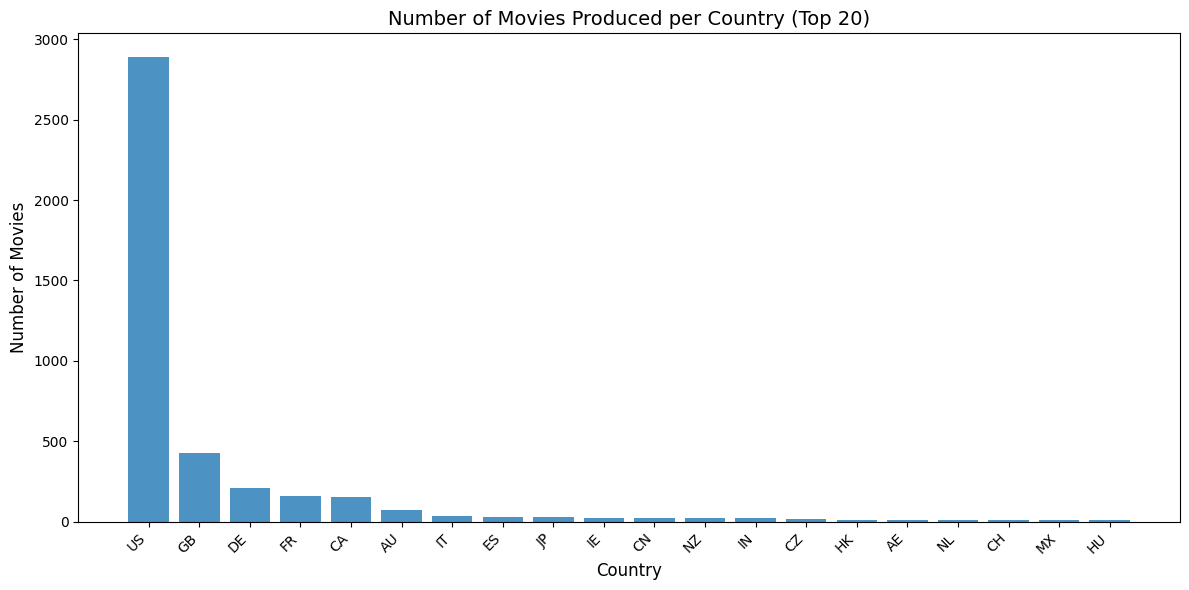

In [1389]:
import matplotlib.pyplot as plt

# Flatten the list of country codes and count occurrences
all_countries = [country for sublist in cleaned_movies_df['parsed_production_countries'] for country in sublist]
country_counts = Counter(all_countries)

# Convert to a DataFrame for easier analysis
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Check how many countries occur only once
single_occurrence_count = (country_counts_df['Frequency'] == 1).sum()
print(f"\nNumber of countries that appear only once: {single_occurrence_count}")

# Plot the top 20 countries by frequency
plt.figure(figsize=(12, 6))
plt.bar(country_counts_df['Country'][:20], country_counts_df['Frequency'][:20], alpha=0.8)
plt.title('Number of Movies Produced per Country (Top 20)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Observation: 
- US appears in 2892 movies, making it the most dominant production country.
- Countries like the UK, Germany, France, and Canada have significant representation but are far behind the US.
- Only 13 appear once, indicating minimal influence.



The dominance of US is likely correlated with other features like budget, popularity, or revenue. Lets explore that further with **Correlation Analysis**

In [1390]:
# Create a binary column for 'is_US'
cleaned_movies_df['is_US'] = cleaned_movies_df['parsed_production_countries'].apply(lambda x: 1 if 'US' in x else 0)

# Check correlations with numerical features
correlation_with_us = cleaned_movies_df[['is_US', 'budget', 'popularity', 'revenue']].corr()
print("Correlation of 'is_US' with key features:")
print(correlation_with_us['is_US'])


Correlation of 'is_US' with key features:
is_US         1.000000
budget        0.134798
popularity    0.073939
revenue       0.110020
Name: is_US, dtype: float64


The correlation is low but since US is overwhelmingly dominant here. We currently have 3102 rows, out of which 2892 movies were produced in United States (93%). Given this, the feature has little variability.

Since there are movies proced in multiple countries. We have decided to **create a feature representing the number of production countries** instead, as it indicates international collaborations, which could influence revenue. 

In [1391]:
# Create a feature representing the number of production countries for each movie
cleaned_movies_df['num_production_countries'] = cleaned_movies_df['parsed_production_countries'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_production_countries':")
print(cleaned_movies_df[['title', 'parsed_production_countries', 'num_production_countries']].head())

# Analyze the distribution of 'num_production_countries'
country_count_distribution = cleaned_movies_df['num_production_countries'].value_counts()
print("\nDistribution of 'num_production_countries':")
print(country_count_distribution)


First 5 rows with 'num_production_countries':
                                      title parsed_production_countries  \
0                                    Avatar                    [US, GB]   
1  Pirates of the Caribbean: At World's End                        [US]   
2                                   Spectre                    [GB, US]   
3                     The Dark Knight Rises                        [US]   
4                               John Carter                        [US]   

   num_production_countries  
0                         2  
1                         1  
2                         2  
3                         1  
4                         1  

Distribution of 'num_production_countries':
num_production_countries
1     2256
2      582
3      170
4       64
0       14
5       12
6        2
12       1
8        1
Name: count, dtype: int64


Observations
- A majority of movies (2256) are produced in only one country. These are likely dominated by US-based productions.

- Movies with 2 or more countries involved (582 with 2 countries, 170 with 3 countries) indicate international collaborations, which might have unique effects on revenue.

- A few movies have a high number of production countries (6, 8, 12). These could represent co-productions across multiple regions, worth further investigation.

- Missing Values: 14 movies have 0 production countries listed.

In [1392]:
# Drop rows where 'num_production_countries' is 0
cleaned_movies_df = cleaned_movies_df[cleaned_movies_df['num_production_countries'] > 0]

# drop redundant columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['production_countries'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_production_countries'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['is_US'])


# Verify the column has been dropped
print("Columns after dropping 'production_countries':")
print(cleaned_movies_df.columns)

Columns after dropping 'production_countries':
Index(['budget', 'id', 'language', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'status', 'title', 'vote_average',
       'movie_id', 'main_actor_names', 'main_actor_genders', 'directors',
       'writers', 'producers', 'crew_size', 'vote_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'Top_Companies', 'Other_Companies', 'num_production_countries'],
      dtype='object')


The `spoken_languages` column is another important feature to explore, as it might provide insights into a movie’s accessibility or cultural reach

In [1393]:
# Inspect the first few rows of 'spoken_languages'
print("First 5 rows of 'spoken_languages':")
print(cleaned_movies_df['spoken_languages'].head())

# Check for missing values in 'spoken_languages'
missing_languages = cleaned_movies_df['spoken_languages'].isnull().sum()
print("\nMissing values in 'spoken_languages':", missing_languages)

# Analyze unique values
unique_languages = cleaned_movies_df['spoken_languages'].unique()
print("\nNumber of unique entries in 'spoken_languages':", len(unique_languages))


First 5 rows of 'spoken_languages':
0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

Missing values in 'spoken_languages': 0

Number of unique entries in 'spoken_languages': 383


Obersations:
- JSON-Like Strings
- 383 unique entries suggest combinations of languages, not just individual ones.

Approach:
- Extract the language codes for each movie
- Find language diversity: Add a column counting the number of spoken languages

In [1394]:

# Function to parse JSON-like strings and extract language codes
def parse_languages(languages_str):
    try:
        languages_list = ast.literal_eval(languages_str)  # Safely evaluate the string to a list of dictionaries
        return [language['iso_639_1'] for language in languages_list]  # Extract the 'iso_639_1' code
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse spoken languages
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Verify the parsed results
print(cleaned_movies_df[['parsed_spoken_languages']].head())

  parsed_spoken_languages
0                [en, es]
1                    [en]
2    [fr, en, es, it, de]
3                    [en]
4                    [en]


In [1395]:
# Count the number of spoken languages for each movie
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Create a feature for the number of spoken languages
cleaned_movies_df['num_spoken_languages'] = cleaned_movies_df['parsed_spoken_languages'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_spoken_languages':")
print(cleaned_movies_df[['title', 'parsed_spoken_languages', 'num_spoken_languages']].head())

First 5 rows with 'num_spoken_languages':
                                      title parsed_spoken_languages  \
0                                    Avatar                [en, es]   
1  Pirates of the Caribbean: At World's End                    [en]   
2                                   Spectre    [fr, en, es, it, de]   
3                     The Dark Knight Rises                    [en]   
4                               John Carter                    [en]   

   num_spoken_languages  
0                     2  
1                     1  
2                     5  
3                     1  
4                     1  


In [1396]:
# Analyze the distribution of 'num_spoken_languages'
language_count_distribution = cleaned_movies_df['num_spoken_languages'].value_counts()
print("\nDistribution of 'num_spoken_languages':")
print(language_count_distribution)


Distribution of 'num_spoken_languages':
num_spoken_languages
1    2128
2     582
3     221
4      92
5      39
6      17
7       3
8       3
0       2
9       1
Name: count, dtype: int64


In [1397]:
# Drop the redundant columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['spoken_languages'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_spoken_languages'])

# Verify the column has been dropped
print("Columns after dropping 'spoken_languages':")
print(cleaned_movies_df.columns)

Columns after dropping 'spoken_languages':
Index(['budget', 'id', 'language', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'title', 'vote_average', 'movie_id',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'Top_Companies', 'Other_Companies', 'num_production_countries',
       'num_spoken_languages'],
      dtype='object')


`Status column` likely contains information about the movie's current status like released, in-production, etc.

Plan:
- Inspect the Values:
    - Check the unique values in the column.

- Analyze Distribution:
    - Determine how many movies fall into each status category. 

In [1398]:
# Check the unique values in the 'status' column
unique_status = cleaned_movies_df['status'].unique()
print("Unique values in 'status':", unique_status)

# Analyze the distribution of values in the 'status' column
status_distribution = cleaned_movies_df['status'].value_counts()
print("\nDistribution of 'status':")
print(status_distribution)

# Check for missing values
missing_status = cleaned_movies_df['status'].isnull().sum()
print("\nMissing values in 'status':", missing_status)


Unique values in 'status': ['Released' 'Post Production']

Distribution of 'status':
status
Released           3087
Post Production       1
Name: count, dtype: int64

Missing values in 'status': 0


Oberservation:
- 99.5% of the dataset is marked released which is great because we want to only include the released movies.
- Only 1 movie is marked as Post Production, which does not provide meaningful information for predicting revenue.
- No missing values

Plan:
- The status column is not useful for modeling and can safely be dropped.
- We also have one row with a movie which is marked under Post Production. Lets remove it since we only need Released movies.

In [1399]:
# Remove rows where 'status' is not 'Released'
cleaned_movies_df = cleaned_movies_df[cleaned_movies_df['status'] == 'Released']

In [ ]:
# Let's drop the 'status' column
cleaned_movies_df = cleaned_movies_df.drop(columns=['status'])


# Verify the results
print("Columns after dropping 'status':")
print(cleaned_movies_df.columns)

print("\nRemaining rows after cleanup:", cleaned_movies_df.shape[0])

Columns after dropping 'status':
Index(['budget', 'id', 'language', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western', 'Top_Companies', 'Other_Companies',
       'num_production_countries', 'num_spoken_languages'],
      dtype='object')

Remaining rows after cleanup: 3087


Let's move on to `release_date`
This is another important feature to explore, as it can provide valuable patterns like seasonal trends, summer blockbustrs, certain days. Additionally, we can refer to this when checking the appearance of stars during a movie release on talk shows.

Let's first look at the data, and come up with a plan.

In [1401]:
# Inspect the first few rows and data type of 'release_date'
print("First 5 rows of 'release_date':")
print(cleaned_movies_df['release_date'].head())

# Check for missing or invalid values
missing_dates = cleaned_movies_df['release_date'].isnull().sum()
print("\nMissing values in 'release_date':", missing_dates)

# Check the data type of 'release_date'
print("\nData type of 'release_date':", cleaned_movies_df['release_date'].dtype)


First 5 rows of 'release_date':
0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

Missing values in 'release_date': 0

Data type of 'release_date': object


In [1402]:
# print oldest release date
print("Oldest release date:", cleaned_movies_df['release_date'].min())

# how release date many before 2010 ?
print("Movies released before 2010:", (cleaned_movies_df['release_date'] < '2010').sum())

# Between what years were most movies released ?
release_years = cleaned_movies_df['release_date'].str[:4]
release_year_counts = release_years.value_counts().sort_index()



Oldest release date: 1916-09-04
Movies released before 2010: 2180


In [1403]:
# Convert 'release_date' to datetime format
cleaned_movies_df['release_date'] = pd.to_datetime(cleaned_movies_df['release_date'], errors='coerce')

# Extract year, month, and day of the week
cleaned_movies_df['release_year'] = cleaned_movies_df['release_date'].dt.year
cleaned_movies_df['release_month'] = cleaned_movies_df['release_date'].dt.month
cleaned_movies_df['release_dayofweek'] = cleaned_movies_df['release_date'].dt.day_name()

# Add a column for seasons
def assign_season(month):
    if pd.isna(month):
        return 'Unknown'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

cleaned_movies_df['release_season'] = cleaned_movies_df['release_month'].apply(assign_season)

# Verify the new columns
print("First 5 rows with new release date features:")
print(cleaned_movies_df[['release_date', 'release_year', 'release_month', 'release_dayofweek', 'release_season']].head())


First 5 rows with new release date features:
  release_date  release_year  release_month release_dayofweek release_season
0   2009-12-10          2009             12          Thursday         Winter
1   2007-05-19          2007              5          Saturday         Spring
2   2015-10-26          2015             10            Monday           Fall
3   2012-07-16          2012              7            Monday         Summer
4   2012-03-07          2012              3         Wednesday         Spring


Do certain release seasons have an impact on revenue ?

Average revenue by season:
release_season
Summer    1.507862e+08
Spring    1.468658e+08
Winter    1.084984e+08
Fall      9.901546e+07
Name: revenue, dtype: float64


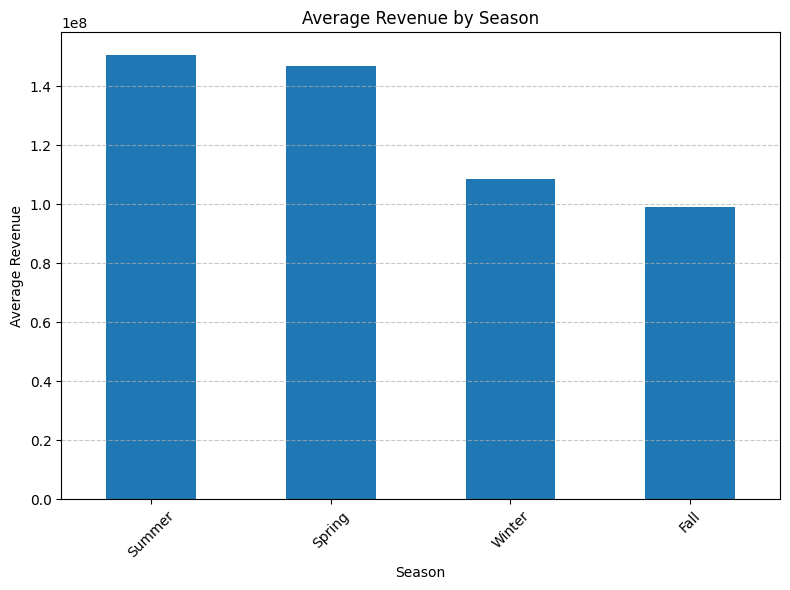

In [1404]:
# Group the data by release season and calculate the mean revenue
seasonal_revenue = cleaned_movies_df.groupby('release_season')['revenue'].mean().sort_values(ascending=False)

# Display the average revenue by season
print("Average revenue by season:")
print(seasonal_revenue)

# Plotting the results
plt.figure(figsize=(8, 6))
seasonal_revenue.plot(kind='bar')
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observations:
<br>
This suggests that movies released in Summer and Spring generally perform better in terms of revenue. 

Analyze if these averages are driven by a few blockbusters or consistent seasonal performance.

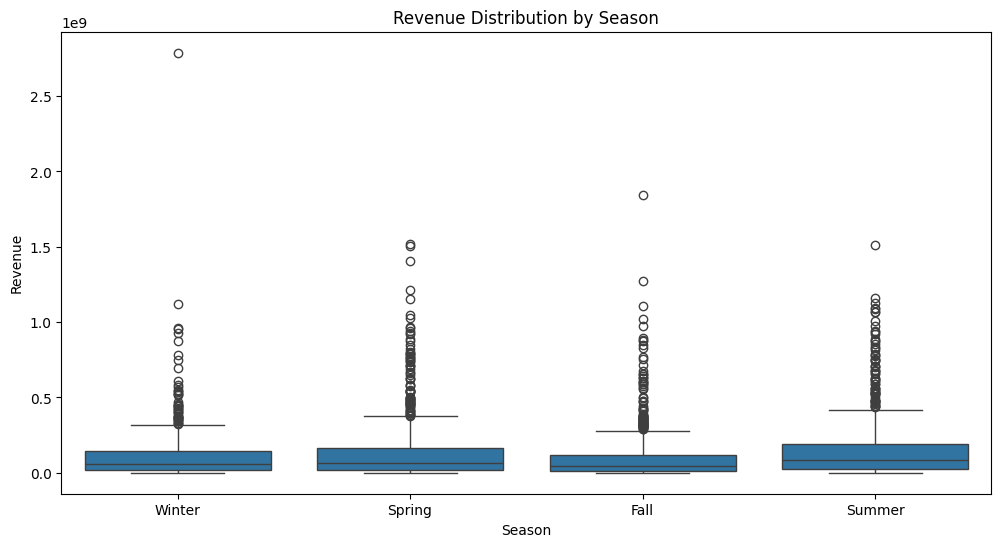

In [1405]:
# Set plot size
plt.figure(figsize=(12, 6))

# Create a box plot for revenue by season
sns.boxplot(data=cleaned_movies_df, x='release_season', y='revenue', showfliers=True)
plt.title('Revenue Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')

# Show the plot
plt.show()


The median revenues seem fairly similar across all seasons, indicating that the central tendency does not vary significantly.<br>
Lets remove the outliers and recalculate the average revenue for each season to see how much the averages are affected by blockbusters.


In [1406]:
# Remove outliers using the IQR method
Q1 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.25)
Q3 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.75)
IQR = Q3 - Q1

def remove_outliers(row):
    q1 = Q1[row['release_season']]
    q3 = Q3[row['release_season']]
    iqr = IQR[row['release_season']]
    return (row['revenue'] >= q1 - 1.5 * iqr) and (row['revenue'] <= q3 + 1.5 * iqr)

filtered_df = cleaned_movies_df[cleaned_movies_df.apply(remove_outliers, axis=1)]

# Recalculate average revenue without outliers
avg_revenue_no_outliers = filtered_df.groupby('release_season')['revenue'].mean()
print(avg_revenue_no_outliers)


release_season
Fall      5.915807e+07
Spring    8.161926e+07
Summer    1.015239e+08
Winter    7.833966e+07
Name: revenue, dtype: float64


In [1407]:
# Verify the changes
print(cleaned_movies_df.columns)

Index(['budget', 'id', 'language', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western', 'Top_Companies', 'Other_Companies',
       'num_production_countries', 'num_spoken_languages', 'release_year',
       'release_month', 'release_dayofweek', 'release_season'],
      dtype='object')


Overvations: <br>
- Summer: Still leads in average revenue even without outliers, confirming that this season generally performs better, likely due to increased audience availability and the release of major blockbusters.
- Spring and Winter: Show similar average revenue levels, though Spring performs slightly better.
- Fall: Has the lowest average revenue

Lets do One-Hot Encoding, and creat features like `season_summer`, `season_winter` with binary values.

In [1408]:
# One-hot encode the 'release_season' column
season_encoded_df = pd.get_dummies(cleaned_movies_df['release_season'], prefix='season')

# Concatenate the encoded columns with the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, season_encoded_df], axis=1)

# Verify the changes
print(cleaned_movies_df.columns)

Index(['budget', 'id', 'language', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'movie_id', 'main_actor_names',
       'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western', 'Top_Companies', 'Other_Companies',
       'num_production_countries', 'num_spoken_languages', 'release_year',
       'release_month', 'release_dayofweek', 'release_season', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')


In [1409]:
# Drop other features related to release date
cleaned_movies_df.drop(columns=['release_season'], inplace=True)

cleaned_movies_df.drop(columns=['release_date'], inplace=True)

cleaned_movies_df.drop(columns=['release_month'], inplace=True)

cleaned_movies_df.drop(columns=['release_dayofweek'], inplace=True)

# Verify the changes
print(cleaned_movies_df.columns)


Index(['budget', 'id', 'language', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'movie_id', 'main_actor_names', 'main_actor_genders',
       'directors', 'writers', 'producers', 'crew_size', 'vote_count',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'Top_Companies', 'Other_Companies', 'num_production_countries',
       'num_spoken_languages', 'release_year', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')


Lets not drop `release_year` year incase we need to analyis trends over time.


Notes for Ola
Next:

We still need to go through the following features:
`main_actor_names`, `main_actor_genders`, `directors`, `writers`, `producers`, `crew_size`.
<br>
Some Analysis ideas:
<br>
1- Proportion of male and female actors in the cast. Does that have an impact on the revenue.<br>
2- We have a feature called `cast_size`. Does having bigger cast size have an impact  on revnue (more resources, etcc)<br>
3- Actor popularity score based on previous movie revenues impact revenue ?<br>
4- we can drop `movie_id` and `id`at the end since it won't be relevant at the end<br>

### 5.2 Correlation analysis